# Data Set Information:

Your client is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers. The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.

The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set:

Historical data of demand for a product-center combination (Weeks: 1 to 145)
* Product(Meal) features such as category, sub-category, current price and discount
* Information for fulfillment center like center area, city information etc.


## Attribute Information:

Weekly Demand data (train.csv): Contains the historical demand data for all centers, test.csv contains all the following features except the target variable

Variable Definition
* id Unique ID
* week Week No
* center_id Unique ID for fulfillment center
* meal_id Unique ID for Meal
* checkout_price Final price including discount, taxes & delivery charges
* base_price Base price of the meal
* emailer_for_promotion Emailer sent for promotion of meal
* homepage_featured Meal featured at homepage
* num_orders (Target) Orders Count


fulfilment_center_info.csv: Contains information for each fulfilment center


Variable Definition
* center_id Unique ID for fulfillment center
* city_code Unique code for city
* region_code Unique code for region
* center_type Anonymized center type
* op_area Area of operation (in km^2)


meal_info.csv: Contains information for each meal being served


Variable Definition
* meal_id Unique ID for the meal
* category Type of meal (beverages/snacks/soups, etc)
* cuisine Meal cuisine (Indian/Italian/etc)



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data_train = pd.read_csv("train.csv")
data_train.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [4]:
data_train.shape

(456548, 9)

In [5]:
data_train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [6]:
data_train['num_orders'].describe()

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

In [7]:
data_test = pd.read_csv("test.csv")
data_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [9]:
data_test.shape

(32573, 8)

In [10]:
data_meal = pd.read_csv("meal_info.csv")
data_meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [11]:
data_meal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [12]:
data_meal.shape

(51, 3)

In [13]:
data_fcenter= pd.read_csv("fulfilment_center_info.csv")
data_fcenter.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [14]:
data_fcenter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [15]:
data_fcenter.shape

(77, 5)

In [16]:
train_final=pd.merge(data_train,data_meal, on="meal_id", how="outer")
train_final = pd.merge(train_final, data_fcenter, on="center_id", how="outer")
train_final.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [17]:
train_final.shape

(456548, 15)

In [18]:
#train_final=train_final.drop(['center_id','meal_id'], axis=1)
#train_final.shape

In [19]:
#cols=train_final.columns.tolist()
#print(cols)

In [20]:
#cols = cols[:2]+cols[9:]+cols[7:9]+cols[2:7]
#print(cols)

In [21]:
#train_final=train_final[cols]
train_final.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
category                  object
cuisine                   object
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
dtype: object

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
lb1 = LabelEncoder()
train_final['center_type'] = lb1.fit_transform(train_final['center_type'])

lb2 = LabelEncoder()
train_final['category'] = lb1.fit_transform(train_final['category'])

lb3 = LabelEncoder()
train_final['cuisine'] = lb1.fit_transform(train_final['cuisine'])

In [24]:
train_final.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,0,3,647,56,2,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,0,3,647,56,2,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,0,3,647,56,2,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,0,3,647,56,2,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,0,3,647,56,2,2.0


# EXPLORATORY  DATA ANALYSIS

In [25]:
train_final.shape

(456548, 15)

<AxesSubplot:xlabel='center_id', ylabel='num_orders'>

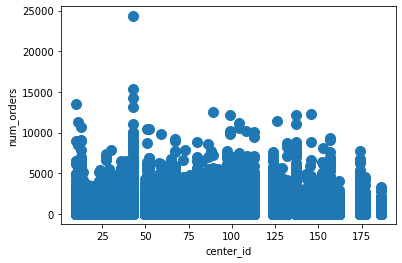

In [26]:
train_final.plot.scatter(x = 'center_id', y = 'num_orders',s=100)


<AxesSubplot:>

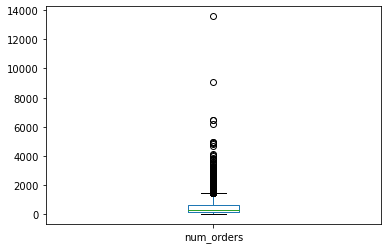

In [27]:
train_final.groupby('center_id').num_orders.sum()#.plot.bar()
train_final[train_final['center_id']==10][['num_orders']].plot.box()
#train_final[train_final['center_id']==10][['num_orders']].sum()

C:\Users\saicb\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'num_orders Distribution')

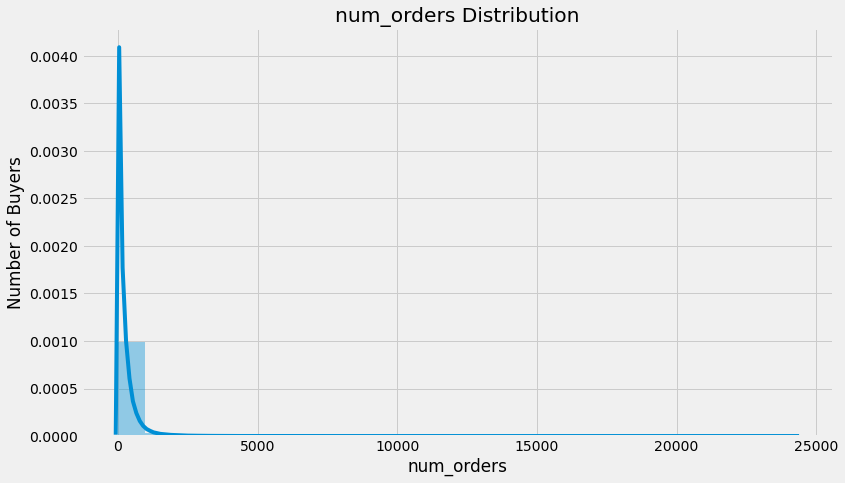

In [28]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(train_final.num_orders, bins = 25)
plt.xlabel("num_orders")
plt.ylabel("Number of Buyers")
plt.title("num_orders Distribution")

In [29]:
def reciprocal(x):
    y = 1/x
    return y

In [30]:
hehe = reciprocal(train_final.num_orders)

In [31]:
import math
def log(x):
    y = math.log(x, 10)
    return y

In [32]:
#haha['numorders'] = log(train_final.num_orders)

C:\Users\saicb\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'num_orders Distribution')

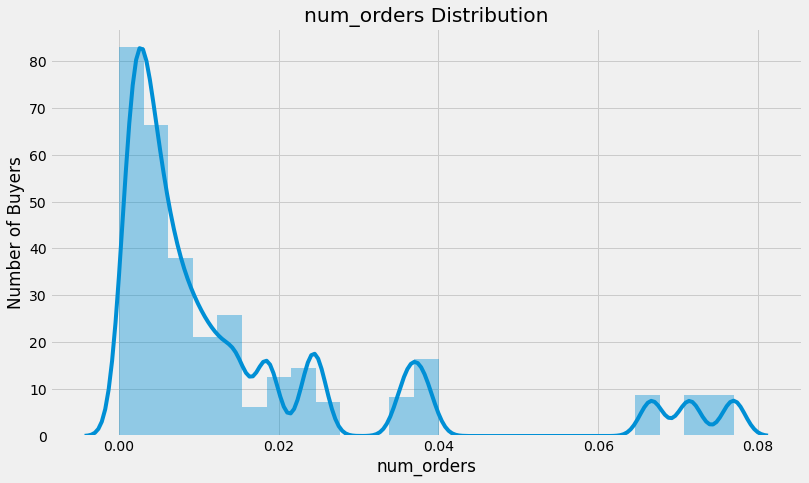

In [33]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(hehe, bins = 25)
plt.xlabel("num_orders")
plt.ylabel("Number of Buyers")
plt.title("num_orders Distribution")

# FEATURE ENGINEERING

In [34]:
train_final2 = train_final.drop(['id'], axis=1)
correlation = train_final2.corr(method='pearson')
columns = correlation.nlargest(15, 'num_orders').index
columns

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category', 'meal_id', 'week',
       'center_type', 'center_id', 'base_price', 'checkout_price'],
      dtype='object')

In [35]:
features = columns.drop(['num_orders'])
train_final3 = train_final[features]
X = train_final3 #.values
y = train_final['num_orders'] #.values

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

In [36]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train) 
y_pred = LR.predict(X_val)
y_pred[y_pred<0] = 0 

from sklearn import metrics 
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))
print(y_pred)


RMSLE: 157.0884649248964
[ 58.48802229 267.62411947 358.08560776 ... 402.10810959  54.83236418
 146.11091536]


In [38]:

df = pd.DataFrame(X_val)
df['target'] = y_pred
df[['week','center_id','meal_id', 'target']].head()

,week,center_id,meal_id,target
322033,26,29,1558,58.488022
284215,138,113,1971,267.624119
176418,23,75,2539,358.085608
68866,42,57,1109,245.069902
408300,69,102,1993,503.032184
